<a href="https://colab.research.google.com/github/carloshernangarrido/Raschka-Book-Examples/blob/main/keras_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])

<function matplotlib.pyplot.show>

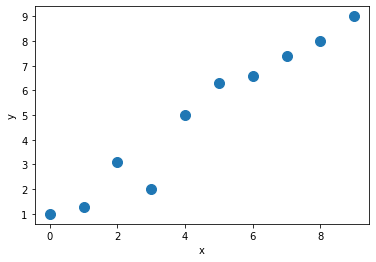

In [4]:
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show

<function matplotlib.pyplot.show>

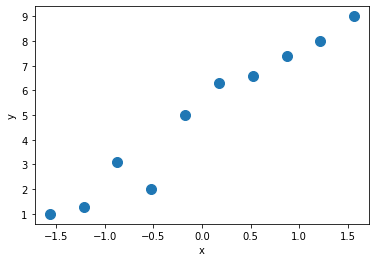

In [5]:
# Standarization
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show

In [6]:
# Tensowflow dataset
ds_train_orig = tf.data.Dataset.from_tensor_slices(
    (tf.cast(X_train_norm, tf.float32), tf.cast(y_train, tf.float32)))
ds_train_orig

<TensorSliceDataset shapes: ((1,), ()), types: (tf.float32, tf.float32)>

In [7]:
# Subclassing tf.keras.Model

class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.w = tf.Variable(0.0, name='weight')
    self.b = tf.Variable(0.0, name='bias')

  def call(self, x):
    return self.w * x + self.b


# Instatieing the new class
model = MyModel()
model.build(input_shape=(None, 1))
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Defining a metric for training
def loss_fn(y_true, y_pred):
  return tf.reduce_mean(tf.square(y_true - y_pred))

# Defining a training method (stochastic gradiend descent)
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as tape:
    current_loss = loss_fn(model(inputs), outputs)
  dW, db = tape.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

In [9]:
# Defining hiperparameters
tf.random.set_seed(1)
num_epochs = 200
log_steps = 100
learning_rate = 0.001
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train) / batch_size))

In [17]:
# Preparing the dataset
ds_train = ds_train_orig.shuffle(buffer_size=len(y_train))\
.repeat(count=None)\
.batch(1)
Ws, bs = [], []

In [20]:
# Training ...
for i, batch in enumerate(ds_train):
  if i >= steps_per_epoch * num_epochs:
    # break the infinite loop
    break

  Ws.append(model.w.numpy())
  bs.append(model.b.numpy())

  bx, by = batch
  loss_val = loss_fn(model(bx), by)
  
  train(model, bx, by, learning_rate=learning_rate)
  if i%log_steps==0:
    print('Epoch {:4d} Step {:2d} Loss {:6.4f}'.
          format(int(i/steps_per_epoch), i, loss_val))

Epoch    0 Step  0 Loss 3.9956
Epoch   10 Step 100 Loss 0.7483
Epoch   20 Step 200 Loss 0.6807
Epoch   30 Step 300 Loss 8.8028
Epoch   40 Step 400 Loss 6.3460
Epoch   50 Step 500 Loss 8.1591
Epoch   60 Step 600 Loss 3.4334
Epoch   70 Step 700 Loss 2.5842
Epoch   80 Step 800 Loss 2.2535
Epoch   90 Step 900 Loss 3.0808
Epoch  100 Step 1000 Loss 0.7158
Epoch  110 Step 1100 Loss 0.1238
Epoch  120 Step 1200 Loss 0.1136
Epoch  130 Step 1300 Loss 0.3787
Epoch  140 Step 1400 Loss 1.7985
Epoch  150 Step 1500 Loss 0.0944
Epoch  160 Step 1600 Loss 0.0905
Epoch  170 Step 1700 Loss 0.0090
Epoch  180 Step 1800 Loss 0.0015
Epoch  190 Step 1900 Loss 0.0072


In [21]:
########################################################
# Compile a model to be trained by using the Keras API #
########################################################

tf.random.set_seed(1)
model = MyModel()
model.compile(optimizer='sgd', 
              loss=loss_fn,
              metrics=['mae', 'mse'])
model.fit(X_train_norm, y_train,
          epochs=num_epochs, batch_size=batch_size,
          verbose=1)


Epoch 1/200
10/10 [==============================] - 0s 1ms/step - loss: 24.1936 - mae: 4.2272 - mse: 24.1936
Epoch 2/200
10/10 [==============================] - 0s 996us/step - loss: 23.8432 - mae: 4.2359 - mse: 23.8432
Epoch 3/200
10/10 [==============================] - 0s 971us/step - loss: 14.6246 - mae: 3.3842 - mse: 14.6246
Epoch 4/200
10/10 [==============================] - 0s 999us/step - loss: 8.2254 - mae: 2.5414 - mse: 8.2254
Epoch 5/200
10/10 [==============================] - 0s 1ms/step - loss: 5.2206 - mae: 1.9139 - mse: 5.2206
Epoch 6/200
10/10 [==============================] - 0s 1ms/step - loss: 3.3134 - mae: 1.5093 - mse: 3.3134
Epoch 7/200
10/10 [==============================] - 0s 1ms/step - loss: 2.9805 - mae: 1.5563 - mse: 2.9805
Epoch 8/200
10/10 [==============================] - 0s 1ms/step - loss: 2.1105 - mae: 1.2776 - mse: 2.1105
Epoch 9/200
10/10 [==============================] - 0s 1ms/step - loss: 1.8970 - mae: 1.2999 - mse: 1.8970
Epoch 10/200
10/